<a href="https://colab.research.google.com/github/skarthi369/CODEaLPHA-PROJECT-/blob/main/Predictive_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('boston_housing.csv')

In [1]:
from google.colab import files
uploaded = files.upload()

Saving boston_housing.csv to boston_housing.csv


In [18]:
# View the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handle missing values (e.g., impute with mean or median)
data.fillna(data.mean(), inplace=True)

# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['RM', 'LSTAT', 'PTRATIO', 'MEDV']] = scaler.fit_transform(data[['RM', 'LSTAT', 'PTRATIO', 'MEDV']])

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


In [19]:
# Split the data into features (X) and target (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Create a simple linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

In [21]:
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

MSE: 0.25
R-squared: 0.69


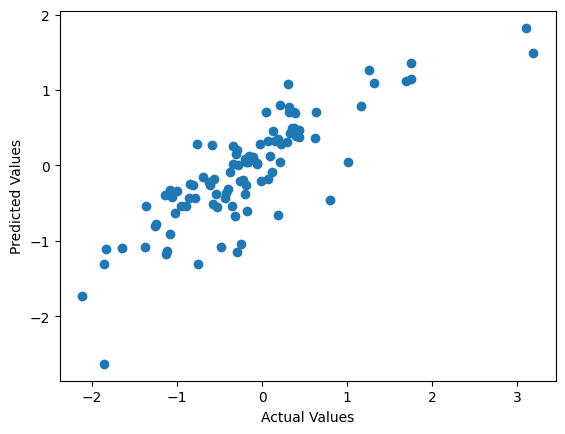

In [22]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()